In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [ ]:
csvpath = 'FReD-2024-11-29.csv'

In [ ]:
data_raw = pd.read_csv(csvpath)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_raw.isna().sum())

id                                            0
temp                                        232
status                                        0
cos                                         503
validated                                     0
validated_person                              2
source                                        0
discipline                                  137
effect                                      346
tags                                        157
description                                   1
claim_text_orig                             503
claim_statistics_orig                       503
claim_statistics_orig_page                  503
claim_text_orig_page                        503
notes                                       180
contributors                                  3
date_entered                                  0
date_updated                                505
notes_validation                            421
exclusion                               

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_raw.describe())

           status  cos  validated  claim_statistics_orig_page  \
count  505.000000  2.0      505.0                    2.000000   
mean     2.029703  1.0        1.0                  367.500000   
std      0.169935  0.0        0.0                    0.707107   
min      2.000000  1.0        1.0                  367.000000   
25%      2.000000  1.0        1.0                  367.250000   
50%      2.000000  1.0        1.0                  367.500000   
75%      2.000000  1.0        1.0                  367.750000   
max      3.000000  1.0        1.0                  368.000000   

       claim_text_orig_page  date_entered  date_updated  exclusion  \
count              2.000000    505.000000           0.0        0.0   
mean             367.500000  45187.051161           NaN        NaN   
std                0.707107    205.965444           NaN        NaN   
min              367.000000  44927.000000           NaN        NaN   
25%              367.250000  45016.000000           NaN        N

In [ ]:
for col in data_raw.columns:
    print(f'Column {col}:')
    print(f'\tNumber of unique values: {data_raw[col].nunique()}')
    if data_raw[col].nunique() < 10:
        print(f'\tUnique values: {data_raw[col].unique()}')
        print(f'\tValue counts: {data_raw[col].value_counts()}\n')
    else:
        print(f'Many unique values, not displaying.')


Column id:
	Number of unique values: 389
Many unique values, not displaying.
Column temp:
	Number of unique values: 164
Many unique values, not displaying.
Column status:
	Number of unique values: 2
	Unique values: [2. 3.]
	Value counts: status
2.0    490
3.0     15
Name: count, dtype: int64

Column cos:
	Number of unique values: 1
	Unique values: [nan  1.]
	Value counts: cos
1.0    2
Name: count, dtype: int64

Column validated:
	Number of unique values: 1
	Unique values: [1]
	Value counts: validated
1    505
Name: count, dtype: int64

Column validated_person:
	Number of unique values: 7
	Unique values: ['CD' 'LKasseckert' 'Veronica Boyce' 'LK, LR' 'LK' 'LR' nan 'LK asseckert']
	Value counts: validated_person
LK                166
Veronica Boyce    121
CD                109
LKasseckert        48
LR                 43
LK, LR             15
LK asseckert        1
Name: count, dtype: int64

Column source:
	Number of unique values: 14
Many unique values, not displaying.
Column discipline:
	

In [ ]:
count = 0
for col in data_raw.columns:
    count +=1
print(count)

119


In [ ]:
#let me know if this covers all we'll need
relevant_cols = [
    'discipline',
    'effect',
    'tags',
    'es_original',
    'es_rep',
    'n_original',
    'n_replication',
    'p_value_original', 'vi_original',
    'p_value_replication',
    'result',
    'ci.lower_original', 'ci.upper_original',
    'ci.lower_replication', 'ci.upper_replication'
]

In [ ]:
optional_cols = [

    #Few rows include these
    'significant_original',
    'power'
    #'significant_replication'

]

In [ ]:
data = data_raw[relevant_cols]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   discipline            368 non-null    object 
 1   effect                159 non-null    object 
 2   tags                  348 non-null    object 
 3   es_original           505 non-null    float64
 4   es_rep                4 non-null      object 
 5   n_original            504 non-null    float64
 6   n_replication         503 non-null    float64
 7   p_value_original      504 non-null    float64
 8   vi_original           504 non-null    float64
 9   p_value_replication   499 non-null    float64
 10  result                505 non-null    object 
 11  ci.lower_original     504 non-null    float64
 12  ci.upper_original     504 non-null    float64
 13  ci.lower_replication  498 non-null    float64
 14  ci.upper_replication  498 non-null    float64
dtypes: float64(10), object(

In [ ]:
data.dtypes

,0
discipline,object
effect,object
tags,object
es_original,float64
es_rep,object
n_original,float64
n_replication,float64
p_value_original,float64
vi_original,float64
p_value_replication,float64


In [ ]:
data_num = data.select_dtypes(include=['number'])
data_cat = data.select_dtypes(exclude=['number'])

In [ ]:
for i in data_num.columns:
    data_num[i] = (data_num[i] - data_num[i].mean()) / data_num[i].std()

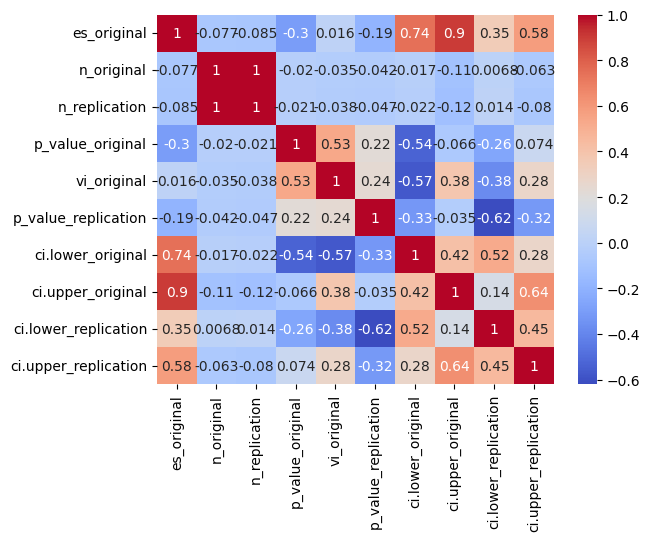

In [ ]:
corr = data_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(data['discipline'].value_counts())

discipline
Psychology                      183
Social Psychology                71
Marketing                        61
Social psychology                20
Cognitive Psychology              6
Developmental Psychology          5
Judgment and Decision Making      4
Experimental Philosophy           4
Organizational Psychology         3
Consumer Psychology               3
Experimental philosophy           2
Cognitive psychology              2
Meta Science                      1
Human Genetics                    1
Health Psychology                 1
Applied Linguistics               1
Name: count, dtype: int64


discipline
Psychology                      183
Social Psychology                91
Marketing                        61
Cognitive Psychology              8
Experimental Philosophy           6
Developmental Psychology          5
Judgment And Decision Making      4
Organizational Psychology         3
Consumer Psychology               3
Meta Science                      1
Human Genetics                    1
Health Psychology                 1
Applied Linguistics               1
Name: count, dtype: int64


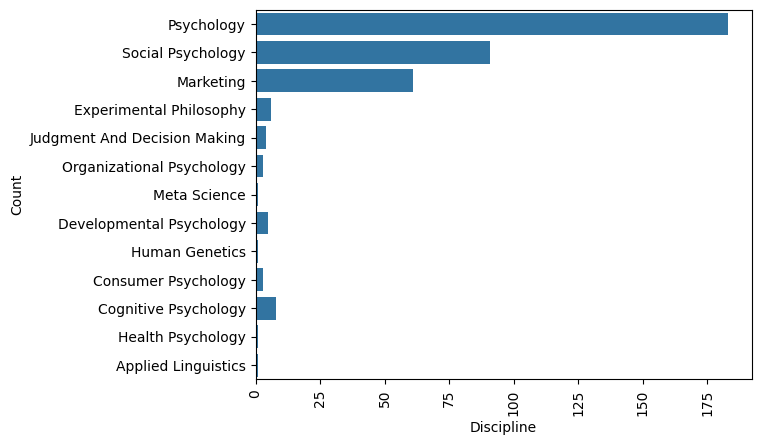

In [ ]:

# Convert all discipline strings to title case
print(data['discipline'].str.title().value_counts())

# Plot using title-case values
sns.countplot(y=data['discipline'].str.title())
plt.xlabel("Discipline".title())
plt.ylabel("Count".title())
plt.xticks(rotation=90)
plt.show()

<ipython-input-118-61416cc81561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['result'] = data['result'].replace('Failure (reversal)', 'Failure')


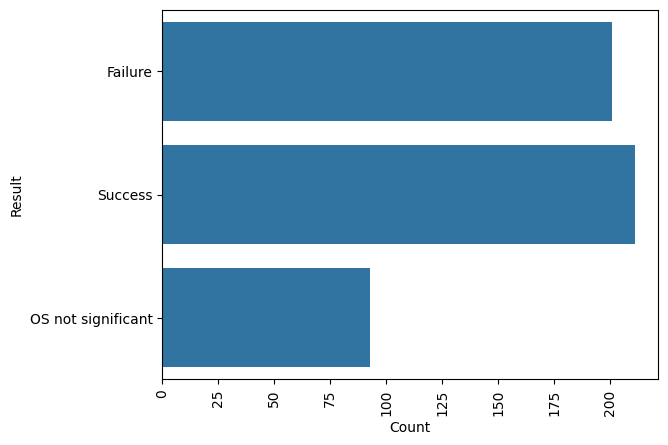

In [ ]:
data['result'] = data['result'].replace('Failure (reversal)', 'Failure')
sns.countplot(data['result'])
plt.xlabel("Count".title())
plt.ylabel("Result".title())
plt.xticks(rotation=90)
plt.show()

In [ ]:

data['result'].value_counts()

,count
result,
Success,211
Failure,201
OS not significant,93


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.isna().sum())

discipline              137
effect                  346
tags                    157
es_original               0
es_rep                  501
n_original                1
n_replication             2
p_value_original          1
vi_original               1
p_value_replication       6
result                    0
ci.lower_original         1
ci.upper_original         1
ci.lower_replication      7
ci.upper_replication      7
dtype: int64


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_num.describe())

        es_original    n_original  n_replication  p_value_original  \
count  5.050000e+02  5.040000e+02   5.030000e+02      5.040000e+02   
mean   1.407015e-17  1.057355e-17   3.531525e-18      1.233581e-17   
std    1.000000e+00  1.000000e+00   1.000000e+00      1.000000e+00   
min   -1.669394e+00 -6.439620e-02  -8.213341e-02     -3.926613e-01   
25%   -6.915085e-01 -6.022201e-02  -7.927968e-02     -3.922824e-01   
50%   -2.545960e-01 -5.487612e-02  -7.357221e-02     -3.465587e-01   
75%    4.638157e-01 -3.891166e-02  -4.434605e-02     -1.347475e-01   
max    3.233930e+00  2.239744e+01   2.232081e+01      6.407990e+00   

        vi_original  p_value_replication  ci.lower_original  \
count  5.040000e+02         4.990000e+02       5.040000e+02   
mean  -4.229421e-17        -3.381842e-17      -7.753939e-17   
std    1.000000e+00         1.000000e+00       1.000000e+00   
min   -5.944776e-01        -8.057215e-01      -4.344014e+00   
25%   -4.866037e-01        -8.047389e-01      -4.42664

In [ ]:
data_num.describe()

,es_original,n_original,n_replication,p_value_original,vi_original,p_value_replication,ci.lower_original,ci.upper_original,ci.lower_replication,ci.upper_replication
count,5.050000e+02,5.040000e+02,5.030000e+02,5.040000e+02,5.040000e+02,4.990000e+02,5.040000e+02,5.040000e+02,4.980000e+02,4.980000e+02
mean,1.407015e-17,1.057355e-17,3.531525e-18,1.233581e-17,-4.229421e-17,-3.381842e-17,-7.753939e-17,2.678633e-16,2.140189e-17,2.140189e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.669394e+00,-6.439620e-02,-8.213341e-02,-3.926613e-01,-5.944776e-01,-8.057215e-01,-4.344014e+00,-2.261354e+00,-3.791243e+00,-2.466611e+00
25%,-6.915085e-01,-6.022201e-02,-7.927968e-02,-3.922824e-01,-4.866037e-01,-8.047389e-01,-4.426641e-01,-8.054438e-01,-5.126533e-01,-8.355635e-01
50%,-2.545960e-01,-5.487612e-02,-7.357221e-02,-3.465587e-01,-2.377542e-01,-4.998629e-01,-2.217168e-01,-1.319533e-01,-9.252335e-02,-2.422980e-01
75%,4.638157e-01,-3.891166e-02,-4.434605e-02,-1.347475e-01,1.161992e-01,6.479947e-01,2.662527e-01,7.062534e-01,4.217693e-01,7.129881e-01
max,3.233930e+00,2.239744e+01,2.232081e+01,6.407990e+00,9.938407e+00,2.359823e+00,3.512036e+00,2.407249e+00,3.999664e+00,2.717286e+00


In [ ]:
for col in data.columns:
    print(f'Column {col}:')
    print(f'\tNumber of unique values: {data[col].nunique()}')
    if data[col].nunique() < 10:
        print(f'\tUnique values: {data[col].unique()}')
        print(f'\tValue counts: {data[col].value_counts()}\n')
    else:
        print(f'Many unique values, not displaying.')


Column discipline:
	Number of unique values: 16
Many unique values, not displaying.
Column effect:
	Number of unique values: 54
Many unique values, not displaying.
Column tags:
	Number of unique values: 192
Many unique values, not displaying.
Column es_original:
	Number of unique values: 402
Many unique values, not displaying.
Column es_rep:
	Number of unique values: 4
	Unique values: [nan 'b = -0.131, se = 0.312, t(1, 81) = -0.420, p = .675'
 'b = 0.420, se = 0.275, t(1, 92) = 1.53, p = .130'
 'b = 0.288, se = 0.306, t(1, 73) = 0.94, p = .349'
 'F(2, 246) = 0.92, p = .398, η² < 0.01, 95% CI [0, 0.04]']
	Value counts: es_rep
b = -0.131, se = 0.312, t(1, 81) = -0.420, p = .675        1
b = 0.420, se = 0.275, t(1, 92) = 1.53, p = .130           1
b = 0.288, se = 0.306, t(1, 73) = 0.94, p = .349           1
F(2, 246) = 0.92, p = .398, η² < 0.01, 95% CI [0, 0.04]    1
Name: count, dtype: int64

Column n_original:
	Number of unique values: 190
Many unique values, not displaying.
Column n_re

I wonder if it's worth including some of these disciplines with <=3 occurences. It might not lead to very accurate predictions, so I'm removing those rows.

In [ ]:
removed_disciplines = ['applied linguistics',
                       'health psychology',
                       'human genetics',
                       'meta science',
                       'consumer psychology',
                       'organizational psychology']
data.drop(data[data['discipline'].isin(removed_disciplines)].index, inplace=True)

<ipython-input-89-46138e243d85>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['discipline'].isin(removed_disciplines)].index, inplace=True)


In [ ]:
dummies = pd.get_dummies(data['discipline'], prefix='disc', dtype=np.int64)
data.drop('discipline', axis=1, inplace=True)
data = pd.concat([data, dummies], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   effect                             159 non-null    object 
 1   tags                               348 non-null    object 
 2   es_original                        505 non-null    float64
 3   es_rep                             4 non-null      object 
 4   n_original                         504 non-null    float64
 5   n_replication                      503 non-null    float64
 6   p_value_original                   504 non-null    float64
 7   vi_original                        504 non-null    float64
 8   p_value_replication                499 non-null    float64
 9   result                             505 non-null    object 
 10  ci.lower_original                  504 non-null    float64
 11  ci.upper_original                  504 non-null    float64

<ipython-input-90-55a6e5367d08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('discipline', axis=1, inplace=True)


In [ ]:
all_tags = data['tags'].str.split(r'[;,]\s?', expand=True, regex=True).stack().str.lower()
all_tags.drop(all_tags[all_tags==''].index, inplace=True) #not sure why this is needed
unique_tags = all_tags.unique()
tag_value_counts = all_tags.value_counts()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(tag_value_counts)

humans                                                    94
male                                                      59
female                                                    58
adult                                                     48
attention                                                 42
social value orientation (slm)                            24
sample 2                                                  24
sample 1                                                  24
social value orientation (tdm)                            24
many labs 2                                               24
reaction time                                             21
social science replication project                        21
science                                                   21
adolescent                                                21
nature                                                    21
human behavior                                            21
pattern recognition     

*This is one of those where there might be a lot of room for improvement*

We're dropping any tag that occurs less than 10 times. This might mean that some papers are left without tags. Since about 150 papers don't have tags anyways, it's not like it wasn't an optional feature anyways. Still, there will be some extra papers left without tags—meaning there's probably a more optimal way to find the smallest set of tags that cover all the papers (so we don't increase the number of papers without tags).

In [ ]:
#Drop any tag that occurs less than 10 times
all_tags.drop(all_tags[all_tags.isin(tag_value_counts[tag_value_counts < 10].index)].index,
              inplace=True)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(all_tags.value_counts())

humans                                                    94
male                                                      59
female                                                    58
adult                                                     48
attention                                                 42
social value orientation (tdm)                            24
sample 2                                                  24
social value orientation (slm)                            24
many labs 2                                               24
sample 1                                                  24
nature                                                    21
reaction time                                             21
human behavior                                            21
science                                                   21
social science replication project                        21
adolescent                                                21
pattern recognition     

In [ ]:
filtered_tags = all_tags.unique()

In [ ]:
for tag in filtered_tags:
    data[f'tag_{tag}'] = data['tags'].str.contains(tag, case=False, na=False).astype(np.int64)

<ipython-input-96-e1c666571268>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data[f'tag_{tag}'] = data['tags'].str.contains(tag, case=False, na=False).astype(np.int64)
<ipython-input-96-e1c666571268>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data[f'tag_{tag}'] = data['tags'].str.contains(tag, case=False, na=False).astype(np.int64)
<ipython-input-96-e1c666571268>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data[f'tag_{tag}'] = data['tags'].str.contains(tag, case=False, na=False).astype(np.int64)


In [ ]:
data.drop('tags', axis=1, inplace=True)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 78 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   effect                                                      159 non-null    object 
 1   es_original                                                 505 non-null    float64
 2   es_rep                                                      4 non-null      object 
 3   n_original                                                  504 non-null    float64
 4   n_replication                                               503 non-null    float64
 5   p_value_original                                            504 non-null    float64
 6   vi_original                                                 504 non-null    float64
 7   p_value_replication                                         499 non-null    float64
 8   